In [ ]:
import pandas as pd
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
validate = pd.read_csv('sample_submission.csv')
validate.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
categorical_cols = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','SaleType','SaleCondition','MiscFeature','Fence','PoolQC','PavedDrive','GarageCond','GarageQual','GarageFinish','GarageType','FireplaceQu','HeatingQC','Heating','Functional','KitchenQual','Electrical','CentralAir','HeatingQC','Heating','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtQual','BsmtCond','ExterCond','ExterQual','Foundation','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','HouseStyle']
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_categorical = ohe.fit_transform(train_data[categorical_cols])

X_test_categorical = ohe.transform(test_data[categorical_cols])

X_train_categorical_df = pd.DataFrame(X_train_categorical, columns=ohe.get_feature_names_out(categorical_cols))
X_test_categorical_df = pd.DataFrame(X_test_categorical, columns=ohe.get_feature_names_out(categorical_cols))

train_data_encoded = pd.concat([train_data.drop(columns=categorical_cols), X_train_categorical_df], axis=1)
test_data_encoded = pd.concat([test_data.drop(columns=categorical_cols), X_test_categorical_df], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Fill NaN values with the mean for numeric columns only
train_data_encoded_numeric = train_data_encoded.select_dtypes(include=[int, float])
test_data_encoded_numeric = test_data_encoded.select_dtypes(include=[int, float])

# Fill NaN in the original DataFrame
train_data_encoded.update(train_data_encoded_numeric.fillna(train_data_encoded_numeric.mean()))
test_data_encoded.update(test_data_encoded_numeric.fillna(test_data_encoded_numeric.mean()))


In [ ]:
x_train = train_data_encoded.drop(['SalePrice'],axis=1)
y_train = train_data_encoded['SalePrice']

x_test = test_data_encoded

In [ ]:
y_test = validate['SalePrice']

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

pca = PCA(n_components=5)
x_train_pca = pca.fit_transform(x_scaled)

In [ ]:
x_test_scaled = scaler.transform(x_test)
x_test_pca = pca.transform(x_test_scaled)

In [ ]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
mdl.fit(x_train_pca,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = mdl.predict(x_test_pca)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error (MSE): 4335983352.85
R-squared: -14.90


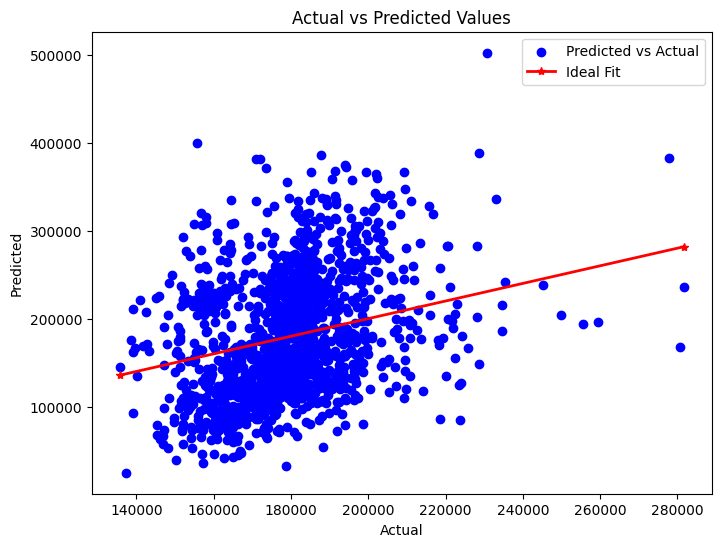

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit',marker='')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()